In [ ]:
'''
"Genomic environments scale the activities of diverse core promoters"
Hong, C. K. Y., & Cohen, B. A. (2022). Genomic environments scale the activities of diverse core promoters. Genome research, 32(1), 85–96. 
https://doi.org/10.1101/gr.276025.121

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8744677/
supplemental files: https://genome.cshlp.org/content/32/1/85/suppl/DC1

Supplemental_Data_S9.gb - TRIP plasmid
Supplemental Table S3 - promoter sequences selected for TRIP
Supplemental_Data_S2.tsv - Expression and genomic locations of TRIP integrations.
'''

'\n"Genomic environments scale the activities of diverse core promoters"\nHong, C. K. Y., & Cohen, B. A. (2022). Genomic environments scale the activities of diverse core promoters. Genome research, 32(1), 85–96. \nhttps://doi.org/10.1101/gr.276025.121\n\nhttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC8744677/\nsupplemental files: https://genome.cshlp.org/content/32/1/85/suppl/DC1\n\nSupplemental_Data_S9.gb - TRIP plasmid\nSupplemental Table S3 - promoter sequences selected for TRIP\nSupplemental_Data_S2.tsv - Expression and genomic locations of TRIP integrations.\n'

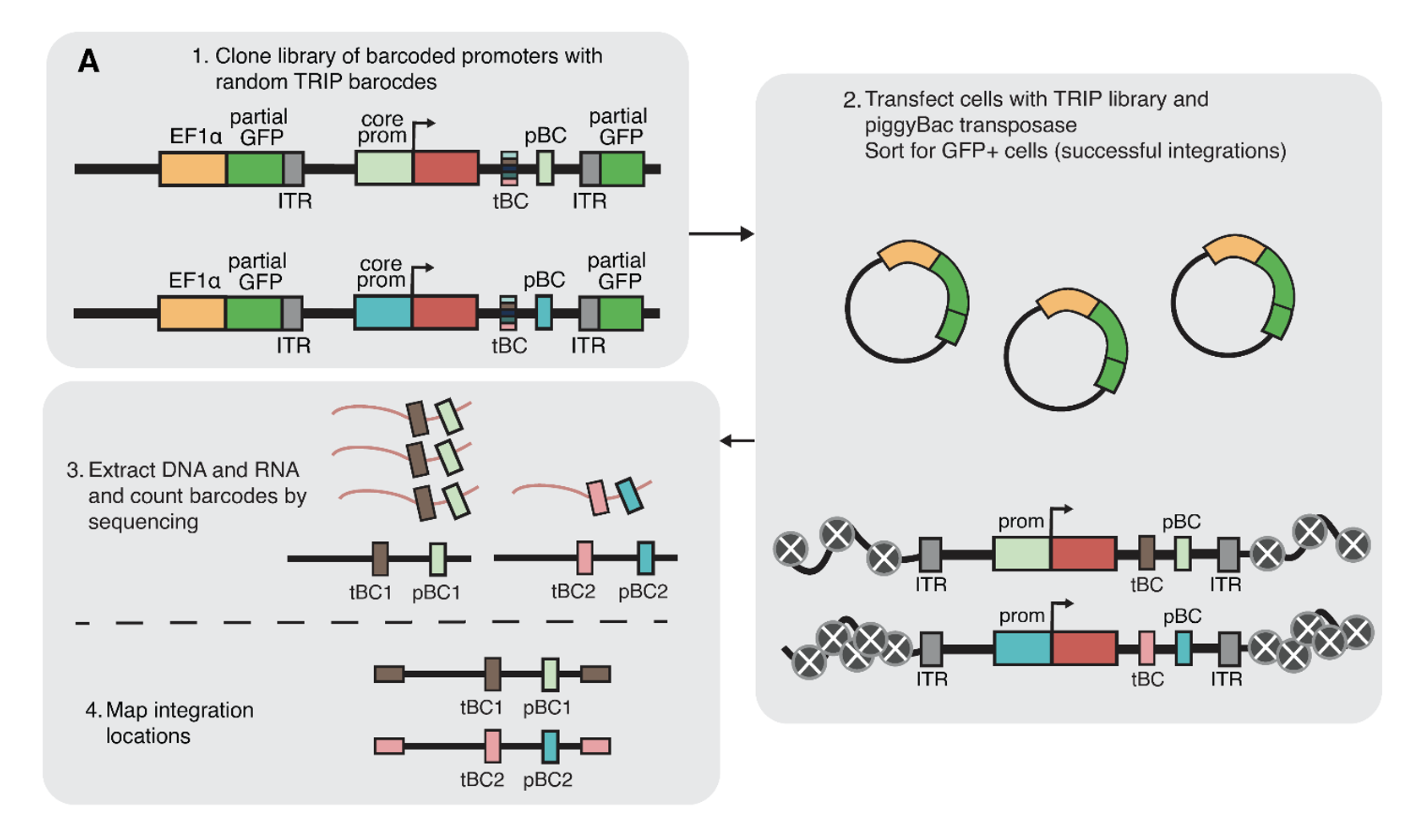

In [ ]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

import pandas as pd
import selene_sdk
from matplotlib import pyplot as plt

from Bio.Seq import Seq

In [ ]:

#download puffin_D.py from https://github.com/jzhoulab/puffin


from puffin_D import *
puffin_d = Puffin_D()

In [ ]:
genome_path = "./resources/Homo_sapiens.GRCh38.dna.primary_assembly.fa"
genome = selene_sdk.sequences.Genome(input_path=genome_path)

In [ ]:
trip_result = pd.read_csv('./resources/Supplemental_Data_S2.tsv', sep='\t')


In [ ]:
oligomers_dict = {'hk1':'GCACAAGATCCTTGCGTCATTTCCTGTAGTGTGCTCTATATAAGGGGCAGGATTTCCGCTTTCGCTCCTTTCCGGCGGTGACGACCTACGCACACGAGAACATGCCTGTGAGTGCTTTGGTCCAGGTTTCGGC',
                 'hk2':'GGGATGCTGATGCTGACTGGCCAAGCTGGGAGGGAAGAAGAAAGGGAGGGGAGGGGAGAATCGAGGACGGACGGCCTAGCCAGGCCAAGAATGCAATTGCCCCGGTGGTGGGAGCTGGGAGACCCCTGTGCT',
                 'hk3':'GGGCGGGGCCTGCGGTTCCCGCGGGGGCGGTGGCGCGCGGTCAGCTGACCCGGCGGGCTTGACCCAGAAGCTGGGCCCTGGCGGCGGATCTGGACGTGGTGAGCCGGACCGGGGGCAGGTGGCAAACTTCAC',
                 'dev1':'CTCGCGATAGTGAGTGAGTTCCCACGAGATCTGATGGTTTTATAAGGGGCTTCCCCGTTACTCAGCACTTCTTCTCTCCTGCCGCCATTTGAAGGACGTGTCTGCTTCCACTCCTGCCGTGATTGTCAGCTTC',
                 'dev2':'TATCTCCCGATCCTCACTGCCATCTGTGCTGCCAGCATTGGGCTCTTTCTCCTTTGAGAATTCTTTGCACTTCATTGTACTCCATGCTCAGTGCTGCTCACCGTCTGCTTTATAATACAGGCCACGGTGTGCT',
                 'dev3':'CTGAGGCTTGCGGCCACACCCTTGGCCCATAGGGTATAAATAGACCTGCTTGGGAGCCCACACCCAGCAACTCACACCTGCCTCAGACCAGAGCTCTGTGCGGGTGACGGCGCACGCATTCCTTGTGTCCCCG'}

#Sequence between two partial GFPs is inserted into the genome
trip_plasmid1 = 'ccctagaaagatagtctgcgtaaaattgacgcatgcattcttgaaatattgctctctctttctaaatagcgcgaatccgtcgctgtgcatttaggacatctcagtcgccgcttggagctcccgtgaggcgtgcttgtcaatgcggtaagtgtcactgattttgaactataacgaccgcgtgagtcaaaatgacgcatgattatcttttacgtgacttttaagatttaactcatacgataattatattgttatttcatgttctacttacgtgataacttattatatatatattttcttgttatagatatcaggcgcgccaagcttggatcc'
#then insert the promoter
trip_plasmid2 = 'cctaggatggtgagcaagggcgaggaggtcatcaaagagttcatgcgcttcaaggtgcgcatggagggctccatgaacggccacgagttcgaaattgagggcgagggcgagggccgcccctacgagggcacccagaccgccaagctgaaggtgaccaagggcggccccctgcccttcgcctgggacatcctgtccccccagttcatgtatggctccaaggcctatgtgaagcaccccgccgacatccccgattacaagaagctgtccttccccgagggcttcaagtgggagcgcgtgatgaacttcgaggacggcggtctggtgaccgtgacccaggactcctccctgcaggacggcacgctcatatacaaggtgaagatgcgcggcaccaacttcccccccgacggccccgtaatgcagaagaagaccatgggctgggaggcctccaccgagcgcctctatccccgcgacggcgtgctgaagggcgaaatacaccaggccctgaagctgaaggacggcggccactacctggtggagttcaagaccatctacatggccaagaagcccgtgcaactgcccggctactactacgtggacaccaagctggacatcacctcccacaacgaggactacaccatcgtggaacaatatgagcgctccgagggccgccaccacctgttcctctatggcatggacgagctctataagtaagagctctcgcttcgagtctaga'
#then insert the barcode
trip_plasmid3 = 'gatcactcgagttgtggccggcccttctctgtaacgtggttgggaaaaccctggcgttaaataaaatacgaaatgagcggccgctaaaagttttgttactttatagaagaaattttgagtttttgtttttttttaataaataaataaacataaataaattgtttgttgaatttattattagtatgtaagtgtaaatataataaaacttaatatctattcaaattaataaataaacctcgatatacagaccgataaaacacatgcgtcaattttacgcatgattatctttaacgtacgtcacaatatgattatctttctaggg'


In [ ]:
#remove entries that are too close to the chrom0some end
''' 

droplines = []

for promoter in ['hk1', 'hk2', 'hk3', 'dev1', 'dev2', 'dev3'][:]:
    print(promoter)
    promoter_predictions = []
    oligomer = oligomers_dict[promoter]
    trip_df = trip_result.loc[trip_result['promoter']==promoter]
    
    for num, num_ind in enumerate(trip_df.index): 
        
        chrm = trip_df['chr'].values[num]
        pos = trip_df['location'].values[num]
        strand = trip_df['strand'].values[num]
        exper =  trip_df['log2(exp)'].values[num]
        barcode = trip_df['TRIP_barcode'].values[num]
        
        if strand == "-":
            offset = 1
        else:
            offset=0

        seq_ = genome.get_sequence_from_coords(chrm, pos-50000+offset, pos+50000+offset, strand)

        if len(seq_) == 0:

            droplines.append(num_ind)
            continue
        
'''

' \n\ndroplines = []\n\nfor promoter in [\'hk1\', \'hk2\', \'hk3\', \'dev1\', \'dev2\', \'dev3\'][:]:\n    print(promoter)\n    promoter_predictions = []\n    oligomer = oligomers_dict[promoter]\n    trip_df = trip_result.loc[trip_result[\'promoter\']==promoter]\n    \n    for num, num_ind in enumerate(trip_df.index): \n        \n        chrm = trip_df[\'chr\'].values[num]\n        pos = trip_df[\'location\'].values[num]\n        strand = trip_df[\'strand\'].values[num]\n        exper =  trip_df[\'log2(exp)\'].values[num]\n        barcode = trip_df[\'TRIP_barcode\'].values[num]\n        \n        if strand == "-":\n            offset = 1\n        else:\n            offset=0\n\n        seq_ = genome.get_sequence_from_coords(chrm, pos-50000+offset, pos+50000+offset, strand)\n\n        if len(seq_) == 0:\n\n            droplines.append(num_ind)\n            continue\n        \n'

In [ ]:
 
droplines = [556,
 2854,
 3605,
 8309,
 10009,
 10094,
 19052,
 21578,
 21646,
 22155,
 27060,
 28112,
 28221,
 36230,
 37061,
 38926]


In [ ]:
trip_result = trip_result.drop(droplines).reset_index(drop=True)

In [ ]:
#Make prediction with Puffin-D
predictions = []


for promoter in ['hk1', 'hk2', 'hk3', 'dev1', 'dev2', 'dev3'][:]:
    print(promoter)
    promoter_predictions = []
    oligomer = oligomers_dict[promoter]
    trip_df = trip_result.loc[trip_result['promoter']==promoter]
    
    for num, num_ind in enumerate(trip_df.index): 
       
        chrm = trip_df['chr'].values[num]
        pos = trip_df['location'].values[num]
        strand = trip_df['strand'].values[num]
        
        barcode = trip_df['TRIP_barcode'].values[num]
        
        if strand == "-":
            offset = 1
        else:
            offset=0

        seq_ = genome.get_sequence_from_coords(chrm, pos-50000+offset, pos+50000+offset, strand)

      
        seq = seq_[:50000]+trip_plasmid1+oligomer+trip_plasmid2+barcode+trip_plasmid3+seq_[50000:] 
       
        seq = seq[:100000]

        pred = puffin_d.predict(seq)
        pred = pred[0, :, 50000-1000:50000+1000]
        promoter_predictions.append(pred)
        
        
            
    predictions.append(promoter_predictions)
    

In [ ]:
predictions_np = np.concatenate((np.array(predictions[0]), np.array(predictions[1]), np.array(predictions[2]), np.array(predictions[3]), np.array(predictions[4]), np.array(predictions[5])), axis=0)

In [ ]:
predictions_np.shape

(41067, 10, 20000)

In [ ]:
targeti=1
pred_tranform = np.log(np.sum(10**predictions_np[:, targeti, :]-1, axis=1))
trip_result['pred'] = pred_tranform

In [ ]:
#experiment prediciton correlation
cors=[]
for p in np.unique(trip_result['promoter']):
    
    selectdata = trip_result.loc[trip_result['promoter']==p]
    print(p, pearsonr(selectdata['log2(exp)'].values, selectdata['pred'].values))
    cors.append(pearsonr(selectdata['log2(exp)'].values, selectdata['pred'].values)[0])

  
print(np.mean(cors))

dev1 (0.4099225774374925, 3.6191268265023466e-256)
dev2 (0.4091314395765546, 1.1449800775076229e-285)
dev3 (0.3839731265477213, 4.198402915057076e-259)
hk1 (0.4060318829229987, 6.6127826172849e-240)
hk2 (0.4041231458058112, 2.7140174686923022e-281)
hk3 (0.41065119207679396, 1.2381631962828225e-278)
0.40397222739456207


In [ ]:
def NormArray(norm_array):
    norm_array = (norm_array-norm_array.mean())/norm_array.std()
    return norm_array

In [ ]:
df_list = []
for p in trip_result['promoter'].unique():
    trip_result_sub = trip_result.loc[trip_result['promoter']==p].reset_index(drop=True)
    norm_array_pred = NormArray(trip_result_sub['pred'].values)
    norm_array_exper = NormArray(trip_result_sub['log2(exp)'].values)
    trip_result_sub['pred_norm'] = norm_array_pred
    trip_result_sub['exper_norm'] = norm_array_exper
    df_list.append(trip_result_sub)
trip_norm = pd.concat(df_list)

In [ ]:
selectdata_sub = trip_norm.sort_values(['chr','location']).reset_index(drop=True)

chrm_lim = [0,]
chrms = []
for i in range(len(selectdata_sub)-1):
    if selectdata_sub['chr'].values[i]!=selectdata_sub['chr'].values[i+1]:
        chrm_lim.append(i)
        chrms.append(selectdata_sub['chr'].values[i])

In [ ]:
for i in range(len(chrm_lim)-1):
    print(chrm_lim[i], chrms[i])

0 chr1
4797 chr10
6893 chr11
9036 chr12
10992 chr13
11671 chr14
12647 chr15
14054 chr16
15459 chr17
17529 chr18
18304 chr19
19642 chr2
22683 chr20
23788 chr21
24363 chr22
25249 chr3
27734 chr4
29410 chr5
31389 chr6
34373 chr7
36880 chr8
38438 chr9
40006 chrX


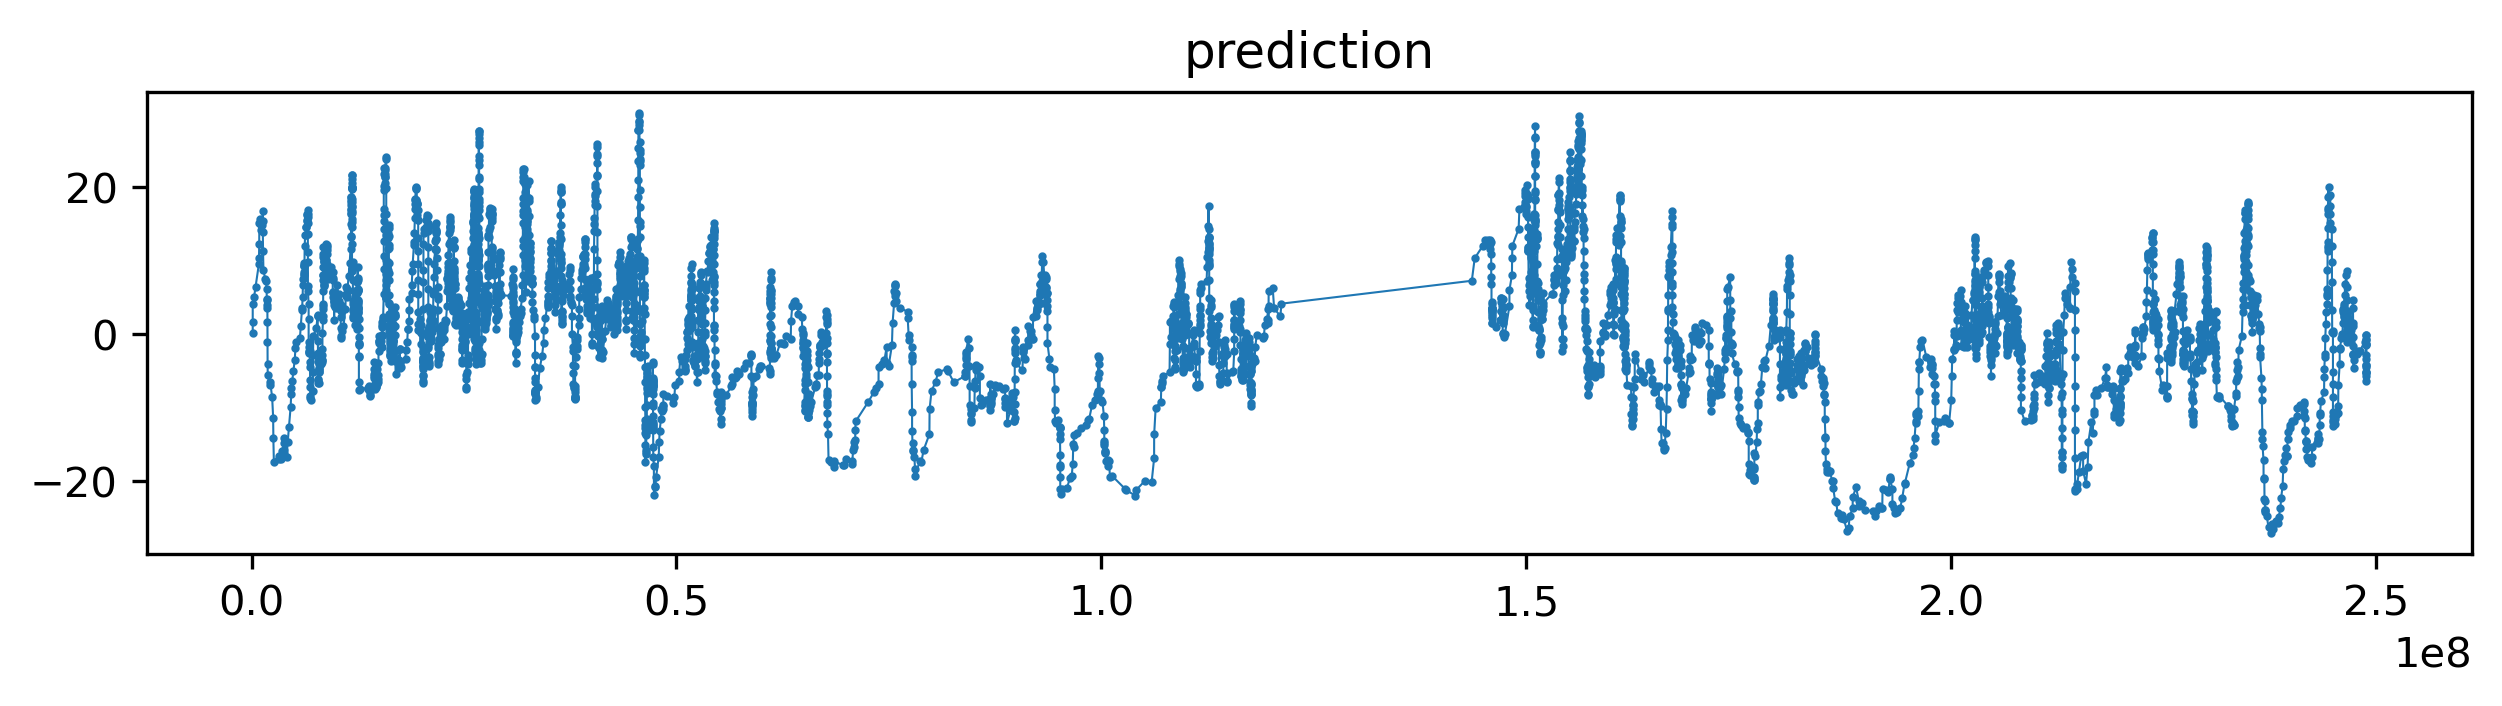

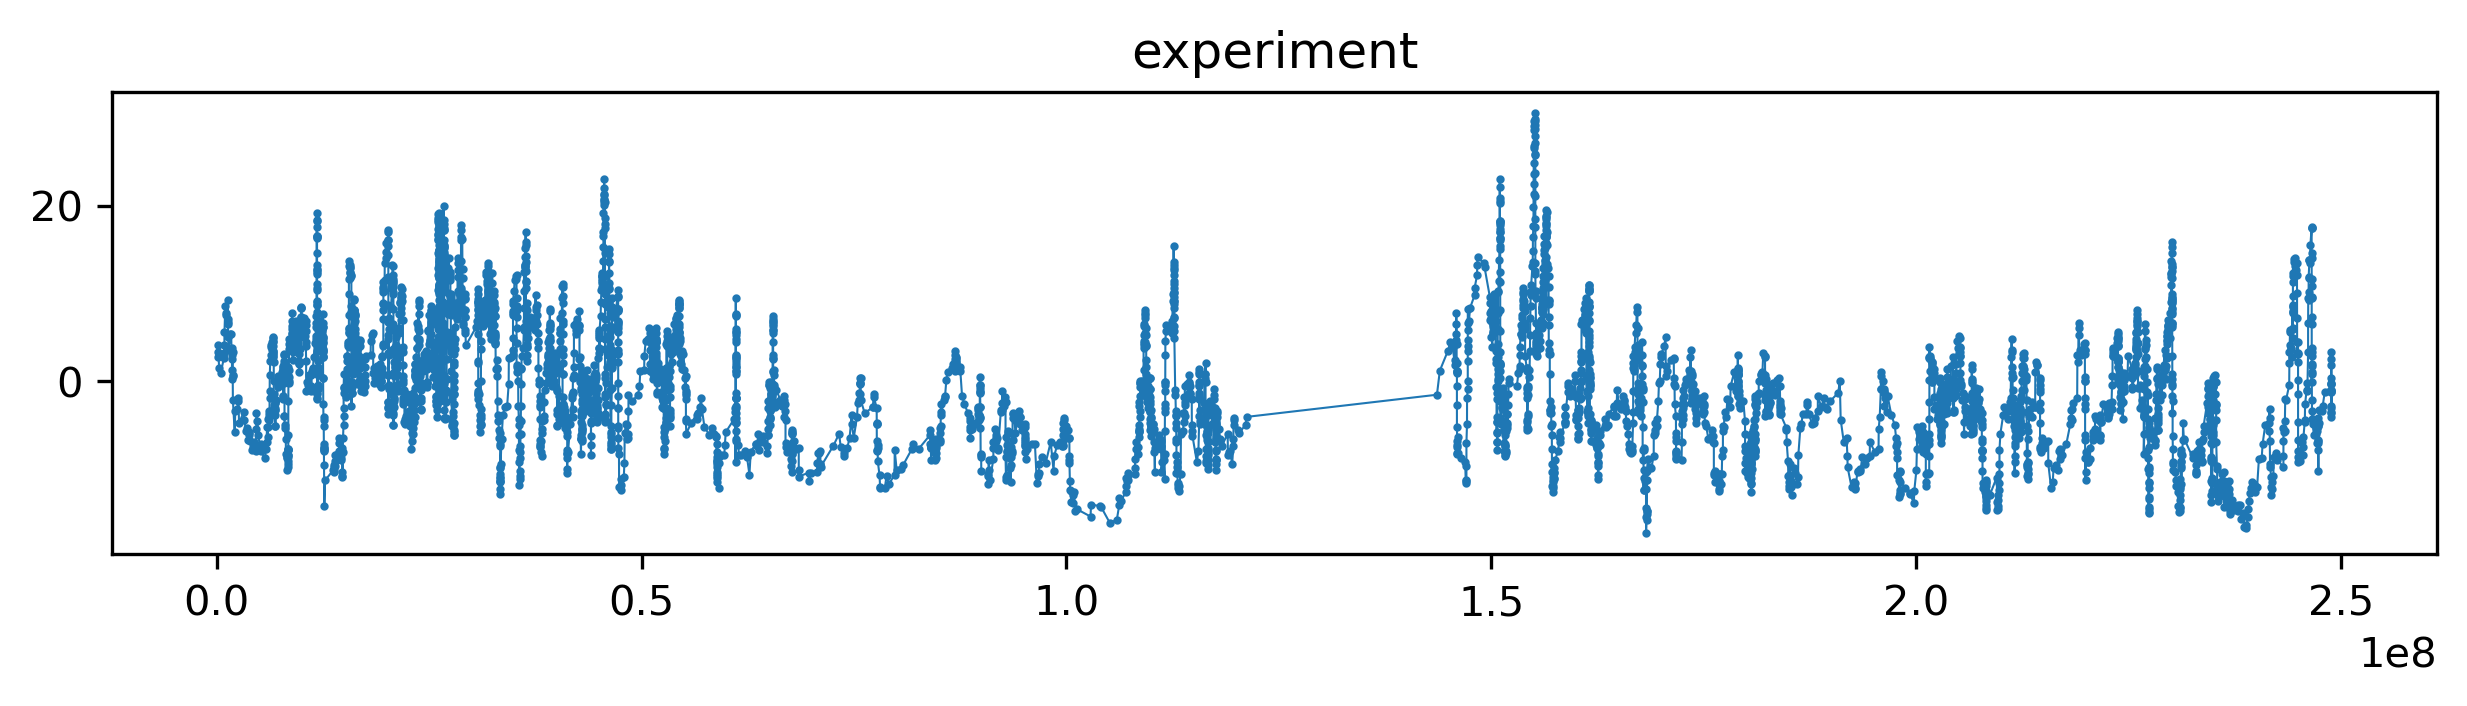

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10,2),dpi=300)
a = 0
b = 4797
plt.plot(selectdata_sub['location'].values[a:b], np.convolve(selectdata_sub['pred_norm'].values,
                 np.ones(20),mode='valid')[a:b], '.',markersize=2, linestyle = '-', linewidth=0.5)
plt.title('prediction')
plt.show()
plt.figure(figsize=(10,2),dpi=300)
plt.plot(selectdata_sub['location'].values[a:b], np.convolve(selectdata_sub['exper_norm'].values,
                 np.ones(20),mode='valid')[a:b], '.',markersize=2, linestyle = '-', linewidth=0.5)
plt.title('experiment')
#plt.xlabel(chrm)
plt.show()

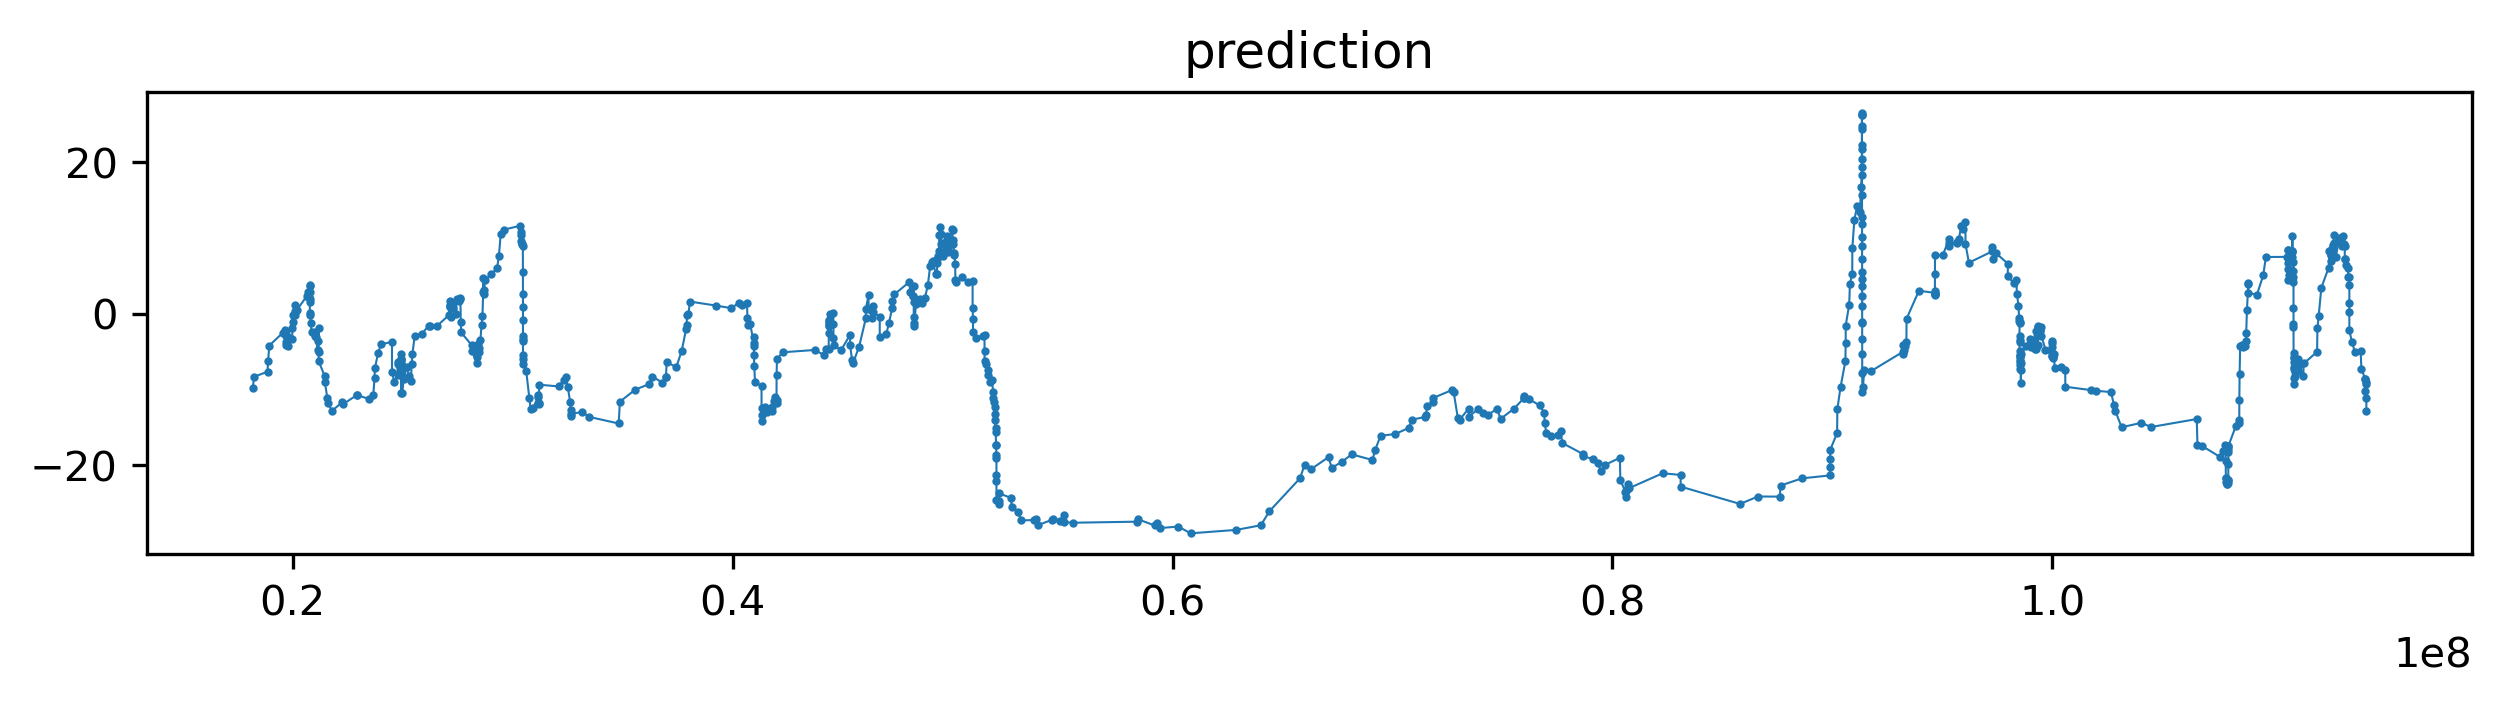

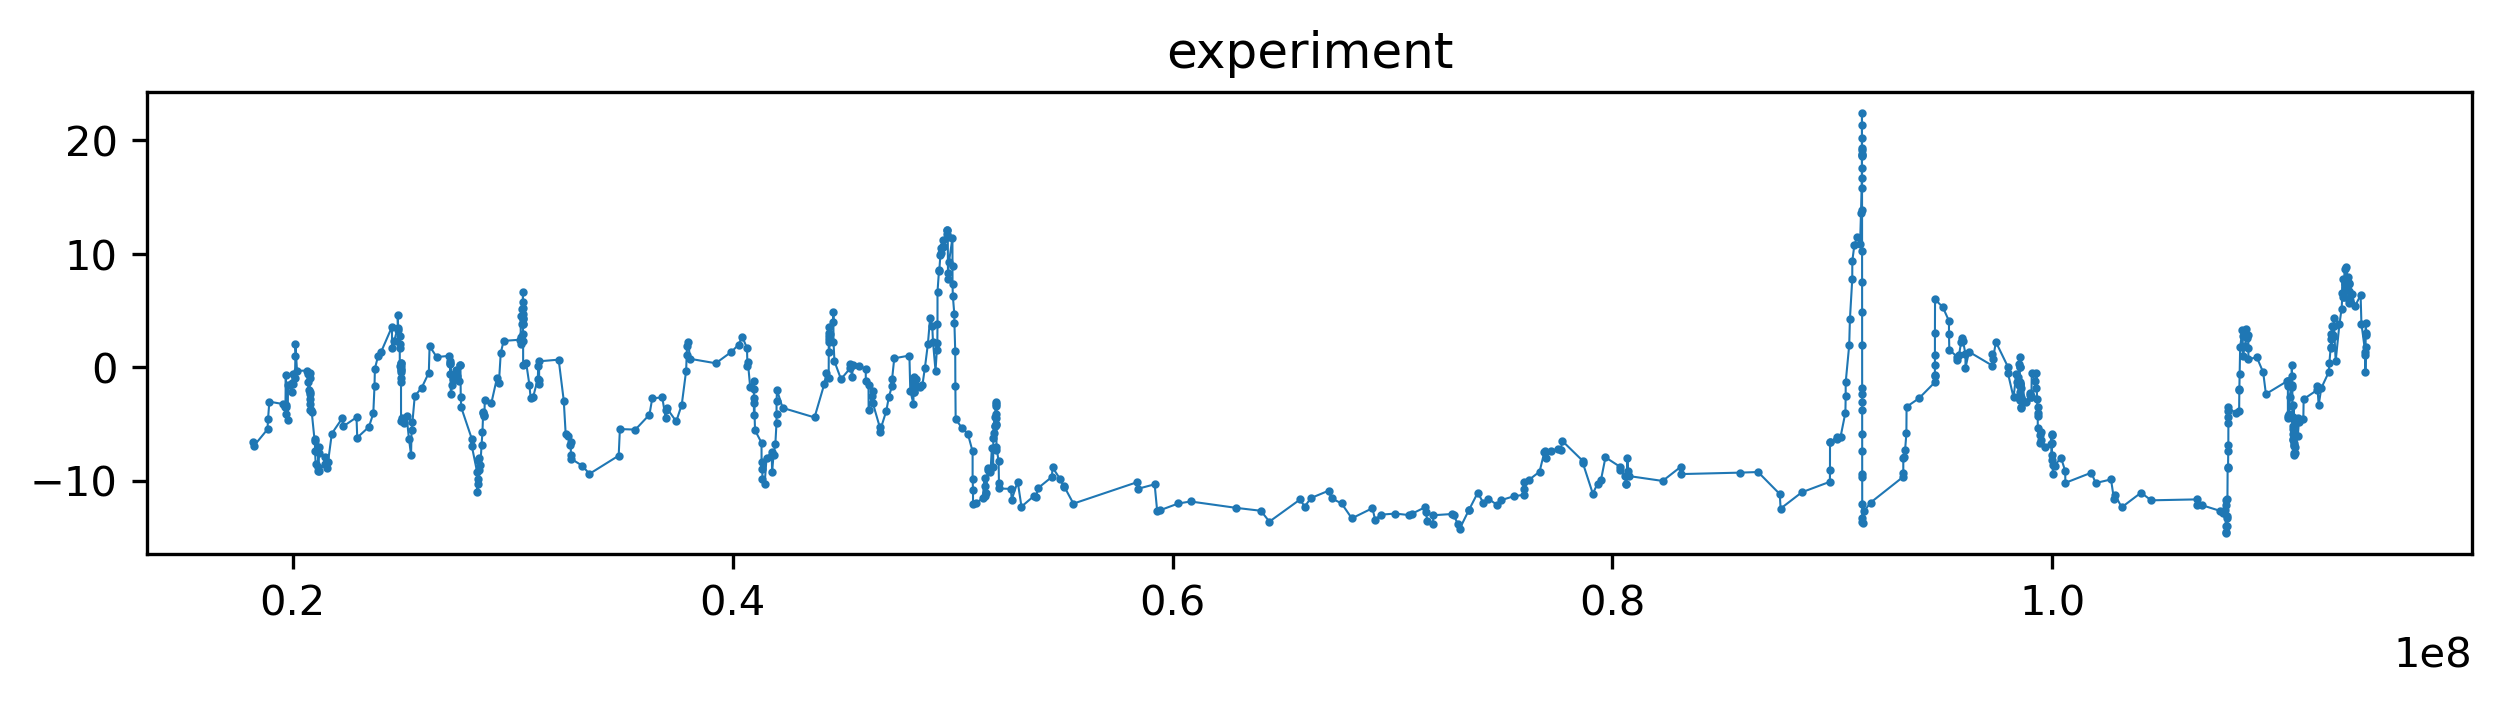

In [ ]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.figure(figsize=(10,2),dpi=300)
a = 10992+1
b = 11671
plt.plot(selectdata_sub['location'].values[a:b], np.convolve(selectdata_sub['pred_norm'].values,
                 np.ones(20),mode='valid')[a:b], '.',markersize=2, linestyle = '-', linewidth=0.5)
plt.title('prediction')
plt.show()
plt.figure(figsize=(10,2),dpi=300)
plt.plot(selectdata_sub['location'].values[a:b], np.convolve(selectdata_sub['exper_norm'].values,
                 np.ones(20),mode='valid')[a:b], '.',markersize=2, linestyle = '-', linewidth=0.5)
plt.title('experiment')
#plt.xlabel(chrm)
plt.show()

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
require(data.table)
require(R.utils)
data = fread('../resources/Supplemental_Data_S2.tsv')
data = data[order(promoter, chr, strand, location, TRIP_barcode)]
data$location_next=NA
data$location_next[1:dim(data)[1]-1] = data$location[2:dim(data)[1]]
data$chr_next=NA
data$chr_next[1:dim(data)[1]-1] = data$chr[2:dim(data)[1]]
data$strand_next=NA
data$strand_next[1:dim(data)[1]-1] = data$strand[2:dim(data)[1]]
data$exp_next=NA
data$exp_next[1:dim(data)[1]-1] = data$`log2(exp)`[2:dim(data)[1]]
data$promoter_next=NA
data$promoter_next[1:dim(data)[1]-1] = data$promoter[2:dim(data)[1]]

data$TRIP_barcode_next=NA
data$TRIP_barcode_next[1:dim(data)[1]-1] = data$TRIP_barcode[2:dim(data)[1]]



p1_1=fread('../resources/GSM5273602_TRIP_mapping_P1_1.bed.gz')
p1_2=fread('../resources/GSM5273603_TRIP_mapping_P1_2.bed.gz')
p2_1=fread('../resources/GSM5273604_TRIP_mapping_P2_1.bed.gz')
p2_2=fread('../resources/GSM5273605_TRIP_mapping_P2_2.bed.gz')
p3_1=fread('../resources/GSM5273606_TRIP_mapping_P3_1.bed.gz')
p3_2=fread('../resources/GSM5273607_TRIP_mapping_P3_2.bed.gz')
p4_1=fread('../resources/GSM5273608_TRIP_mapping_P4_1.bed.gz')
p4_2=fread('../resources/GSM5273609_TRIP_mapping_P4_2.bed.gz')

p1_1$pool="P1_1"
p1_2$pool="P1_2"
p2_1$pool="P2_1"
p2_2$pool="P2_2"
p3_1$pool="P3_1"
p3_2$pool="P3_2"
p4_1$pool="P4_1"
p4_2$pool="P4_2"

p1_1$pool="P1"
p1_2$pool="P1"
p2_1$pool="P2"
p2_2$pool="P2"
p3_1$pool="P3"
p3_2$pool="P3"
p4_1$pool="P4"
p4_2$pool="P4"

pall=rbind(p1_1,p1_2,p2_1, p2_2, p3_1, p3_2, p4_1, p4_2)


pallfilter = pall[V7=='+'&V6>100,][order(V1,V3,V5)]
pallfilter$V5_next=NA
pallfilter$V5_next[1:dim(pallfilter)[1]-1] = pallfilter$V5[2:dim(pallfilter)[1]]
pallfilter$V3_next=NA
pallfilter$V3_next[1:dim(pallfilter)[1]-1] = pallfilter$V3[2:dim(pallfilter)[1]]

pallfilter$pool_next=NA
pallfilter$pool_next[1:dim(pallfilter)[1]-1] = pallfilter$pool[2:dim(pallfilter)[1]]


pallfilter[V3==V3_next, sum(pool!=pool_next)]


data$pool = pallfilter$pool[match(data$TRIP_barcode, pallfilter$V5)]
data$pool_next = pallfilter$pool[match(data$TRIP_barcode_next, pallfilter$V5)]

#due to a mapping issue in original processed data, same locations on the forward strand and within 10bp 
#locations on the reverse strand are considered the same locations

print('Experiment reproducibility: same strand insertions at the same location')
print(data[ location_next-location<10  &  strand ==strand_next & chr==chr_next & promoter==promoter_next & TRIP_barcode!=TRIP_barcode_next,
     cor(`log2(exp)`, exp_next,method = 'pearson'), by=promoter])


print('Experiment reproducibility: same strand insertions  within 10-200bp distance')
print(data[ (location_next-location)>10 & (location_next-location)<200  &  strand ==strand_next & chr==chr_next & promoter==promoter_next & TRIP_barcode!=TRIP_barcode_next,
     cor(`log2(exp)`, exp_next,method = 'pearson'), by=promoter])

print('Experiment reproducibility: same strand insertions  within 200bp-1kb distance')
print(data[ (location_next-location)>200 & (location_next-location)<1000  &  strand ==strand_next & chr==chr_next & promoter==promoter_next & TRIP_barcode!=TRIP_barcode_next,
     cor(`log2(exp)`, exp_next,method = 'pearson'), by=promoter])

[1] "Experiment reproducibility: same strand insertions at the same location"
   promoter        V1
1:     dev1 0.5821698
2:     dev2 0.6220152
3:     dev3 0.4185533
4:      hk1 0.6736971
5:      hk2 0.5510752
6:      hk3 0.4919790
[1] "Experiment reproducibility: same strand insertions  within 10-200bp distance"
   promoter        V1
1:     dev1 0.5494210
2:     dev2 0.4025047
3:     dev3 0.5072140
4:      hk1 0.4948685
5:      hk2 0.4545922
6:      hk3 0.5799728
[1] "Experiment reproducibility: same strand insertions  within 200bp-1kb distance"
   promoter        V1
1:     dev1 0.3882030
2:     dev2 0.3749602
3:     dev3 0.5276080
4:      hk1 0.4151237
5:      hk2 0.4263839
6:      hk3 0.4080027
